In [1]:
!tree ../dataset

../dataset
├── en_espanol
│   ├── docx2txt.py
│   ├── Второй_жанр_исходная.txt
│   └── Первый_жанр_исходная.txt
├── Второй_жанр_исходная.txt
├── Первый_жанр_исходная.txt
├── Сокращение по частям речи
│   ├── 1.Первый жанр исходная выборка.txt
│   ├── 2.Первый жанр без клауз, включающих наречия.txt
│   ├── 3.Первый жанр без клауз, включающих глаголы.txt
│   ├── 4. Первый жанр без клауз, включающих глаголы и наречия.txt
│   ├── Без прилагательных второй жанр.txt
│   ├── Без прилагательных первый жанр.txt
│   └── Случайные выборки.txt
└── сокращение по частотности
    ├── 1а_ без сокращений.txt
    ├── 1б_Изъяты лексемы с частотой выше 100.txt
    ├── 1в_Изъяты лексемы с частотой выше 49.txt
    ├── 1г_Изъяты лексемы с частотой выше 29.txt
    ├── 1д_Изъяты лексемы с частотой выше 9.txt
    ├── 2а_ без сокращений.txt
    ├── 2б_Изъяты лексемы с частотой выше 100.txt
    ├── 2в_Изъяты лексемы с частотой выше 49.txt
    ├── 2г_Изъяты лексемы с частотой выше 29.txt
    └── 2д_Изъяты лексемы 

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from isanlp.simple_text_preprocessor import SimpleTextPreprocessor
from isanlp.processor_razdel import ProcessorRazdel

from isanlp import PipelineCommon
import razdel
from isanlp.simple_text_preprocessor import SimpleTextPreprocessor
from isanlp.processor_razdel import ProcessorRazdel
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import ngram
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import razdel



# 1. Carga de datos modificados (sin adjetivos)
def cargar_datos(archivo, etiqueta):
    with open(archivo, 'r', encoding='utf-8') as f:
        textos = f.readlines()
    return [(texto.strip(), etiqueta) for texto in textos]


tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
max_length = 512

class GeneroDataset(Dataset):
    def __init__(self, datos):
        self.datos = datos

    def __len__(self):
        return len(self.datos)

    def __getitem__(self, idx):
        texto, etiqueta = self.datos[idx]
        tokens = tokenizer(texto,
                            padding='max_length',
                            truncation=True,
                            return_tensors='pt',
                            max_length=max_length)
        return tokens, torch.tensor(etiqueta)

class ProcesadorDatos:
    """Clase para procesar datos con la lógica de procesar_data"""
    
    def __init__(self):
        pass
    
    def __call__(self, datos):
        """
        Método que procesa los datos, elimina los textos entre corchetes, divide en oraciones,
        y devuelve los textos procesados con su respectiva etiqueta.
        """
        datos_procesados = []
        for texto, etiqueta in datos:
            texto_limpio = re.sub(r'\.,', '. Ok999999999 ,', texto)
            texto_limpio = re.sub(r'\.;', '. Ok999999999 ', texto_limpio)
            #texto_limpio = re.sub(r'\. ([a-zа-я])', r'. Ok999999999 \1', texto_limpio)
            for oracion in razdel.sentenize(re.sub(r'\[.*?\]', '', texto_limpio).strip()):  # Elimina corchetes y divide en oraciones
                (oracion.text)
                oracion_texto = re.sub(r'\s*Ok999999999', ' ', (oracion.text)).strip() # Eliminar 'Carlossss' si aparece

                datos_procesados.append((oracion_texto, etiqueta))
        
        return {'datos': datos_procesados}  # Devolvemos el resultado en formato de diccionario

class ProcesadorDatos_modificados:
    """Clase para procesar datos con la lógica de procesar_data"""
    
    def __init__(self):
        pass
    
    def __call__(self, datos):
        """
        Método que procesa los datos, elimina los textos entre corchetes, divide en oraciones,
        y devuelve los textos procesados con su respectiva etiqueta.
        """
        datos_procesados = []
        for texto, etiqueta in datos:
            texto_limpio = re.sub(r'\.,', '. Ok999999999 ,', texto)
            texto_limpio = re.sub(r'\.;', '. Ok999999999 ', texto_limpio)
            texto_limpio = re.sub(r'\. ([a-zа-я])', r'. Ok999999999 \1', texto_limpio)
            texto_limpio = re.sub(r'(\w)([А-Я])', r'\1. \2', texto_limpio)
            for oracion in razdel.sentenize(re.sub(r'\[.*?\]', '', texto_limpio).strip()):  # Elimina corchetes y divide en oraciones
                (oracion.text)
                oracion_texto = re.sub(r'\s*Ok999999999', ' ', (oracion.text)).strip() # Eliminar 'Carlossss' si aparece
                
                datos_procesados.append((oracion_texto, etiqueta))
        
        return {'datos': datos_procesados}  # Devolvemos el resultado en formato de diccionario

ppl_mod = PipelineCommon([
    (ProcesadorDatos_modificados(), ['datos'], {'datos': 'datos'}) 
])

ppl_orignila = PipelineCommon([
    (ProcesadorDatos_modificados(), ['datos'], {'datos': 'datos'}) 
])


/workspace/notebooks/Carlos/fine_tunig_project/mi_entorno/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-16 22:32:10.658936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/workspace/notebooks/Carlos/fine_tunig_project/mi_entorno/lib/python3.8/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
datos_genero1_modificado = cargar_datos('../dataset/сокращение по частотности/1в_Изъяты лексемы с частотой выше 49.txt', 0)
datos_genero2_modificado = cargar_datos('../dataset/сокращение по частотности/2в_Изъяты лексемы с частотой выше 49.txt', 1)
datos_modificados =  datos_genero1_modificado + datos_genero2_modificado
   
datos_modificados_procesados =  ppl_mod(datos_modificados)
# Ver los primeros 10 fragmentos etiquetados



datos_genero1 = cargar_datos('../dataset/Первый_жанр_исходная.txt', 0)
datos_genero2 = cargar_datos('../dataset/Второй_жанр_исходная.txt', 1)
datos_originales =  datos_genero1 + datos_genero2

datos_originales_procesados =  ppl_orignila(datos_originales)

for oracion, etiqueta in datos_modificados_procesados['datos']:
    print(f"Oraciones: {oracion}, Etiqueta: {etiqueta}")

Oraciones: Кустарник ., Etiqueta: 0
Oraciones: метров высотой., Etiqueta: 0
Oraciones: Ветви темно-коричневые., Etiqueta: 0
Oraciones: Годовалые побеги утолщенные, короткие, темно-бурые, при сушке чернеющие, серовато-шерстисто-опушенные., Etiqueta: 0
Oraciones: Почки мономорфные, .-9, яйцевидные округло-яйцевидные,  слегка уплощенным отогнутым носиком,  стороны побега немного уплощенные,  бокам килеватые, темно- красновато-коричневые, шерстисто-опушенные  почти голые., Etiqueta: 0
Oraciones: Прилистники .-12, полусердцевидные,  краю железистопильчатые, голые опушенные., Etiqueta: 0
Oraciones: Черешки 0.6  желобчатые, буроватые, сверху опушенные., Etiqueta: 0
Oraciones: Листья -9  .-  шириной, овальные, продолговатоовальные продолговато-обратноланцетные, острые  короткозаостренные, основании ширококлиновидные  округлые, пильчатые, расставленными мелкими согнутыми зубцами почти цельнокрайные, слегка подвернутые, плотные (жестковатые сухом состоянии), от рассеянно-волосистых более менее г

Comparando: 100%|██████████| 1148/1148 [01:54<00:00, 10.02oración/s]


Tamaño de train: 930
Tamaño de test modificado: 233
Tamaño de nuevo test sin intersecciones: 232
Train data: 930
Test data: 232


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

Epoch 1, Loss: 0.18389393389225006
Epoch 2, Loss: 0.032527193427085876
Epoch 3, Loss: 0.003184288740158081
Accuracy: 0.9956896551724138
Precision: 0.9871794871794872
Recall: 1.0
F1-score: 0.9935483870967742
Confusion Matrix:
[[154   1]
 [  0  77]]
Classification Report:
              precision    recall  f1-score   support

    Género 1       1.00      0.99      1.00       155
    Género 2       0.99      1.00      0.99        77

    accuracy                           1.00       232
   macro avg       0.99      1.00      1.00       232
weighted avg       1.00      1.00      1.00       232



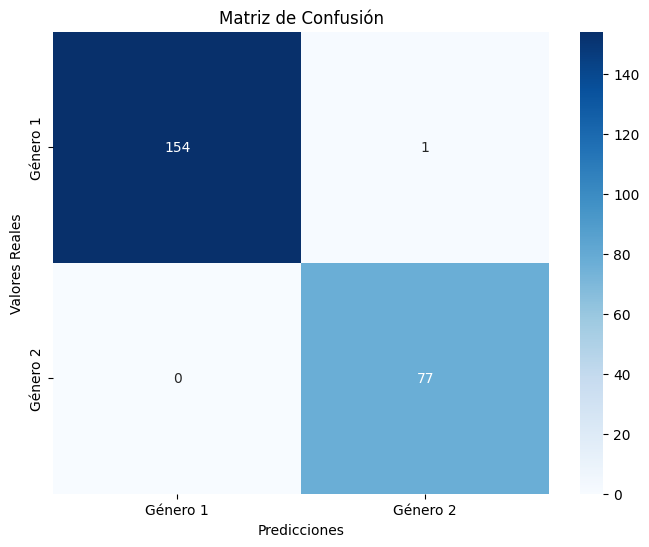

/tmp/ipykernel_45201/2316440988.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


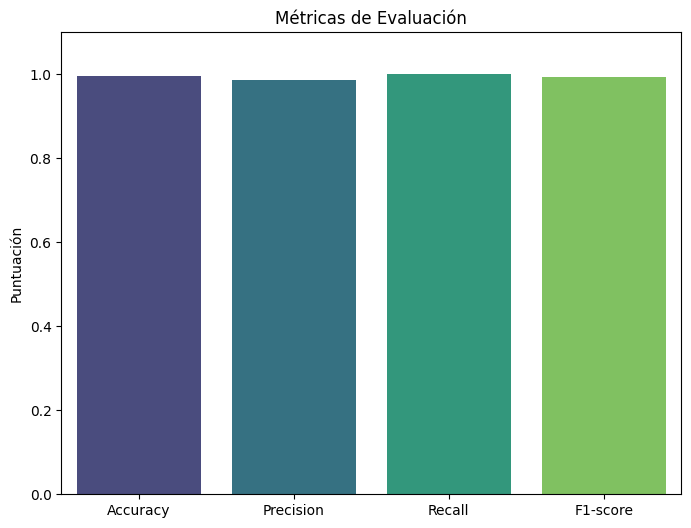

In [4]:
def tokenizar(texto):
        texto_preprocesado = re.sub(r'[^\w\s]', '', texto.lower()) # quita puntuacion y lower case
        tokens = nltk.word_tokenize(texto_preprocesado)
        return tokens

def calcular_similitud_mayoria(texto1, texto2):
    """Calcula si la mayoría de los tokens de una oración están en la otra."""
    tokens1 = set(tokenizar(texto1.lower()))
    tokens2 = set(tokenizar(texto2.lower()))

    
    # Calcula la proporción de tokens de cada oración que están en la otra
    proporción_1_en_2 = len(tokens1 & tokens2) / len(tokens1) if tokens1 else 0
    proporción_2_en_1 = len(tokens1 & tokens2) / len(tokens2) if tokens2 else 0
    
    # Verifica si la mayoría de los tokens de una oración están en la otra (más del 50%)
    #return proporción_1_en_2 > 0.9 or proporción_2_en_1 > 0.9#233 - 284
   #           precision    recall  f1-score   support

    #Género 1       1.00      0.99      0.99       194
    #Género 2       0.98      1.00      0.99        90
    #return proporción_1_en_2 > 0.5 or proporción_2_en_1 > 0.5#233 - 183
    #          precision    recall  f1-score   support

    #Género 1       0.98      1.00      0.99       113
    #Género 2       1.00      0.97      0.99        70
    #return proporción_1_en_2 > 0.7 or proporción_2_en_1 > 0.7#233 - 222
    #return proporción_1_en_2 > 0.8 or proporción_2_en_1 > 0.8#233 - 249
#              precision    recall  f1-score   support

    #Género 1       1.00      0.99      1.00       166
    #Género 2       0.99      1.00      0.99        83
    
    return proporción_1_en_2 > 0.75 or proporción_2_en_1 > 0.75#233 - 232


# Crear el conjunto de entrenamiento y prueba modificado
train_modificado, test_modificado = train_test_split(datos_modificados_procesados['datos'],
                                                     test_size=0.2, random_state=42)

nuevo_test = []

# Bucle con barra de progreso
for oracion_original, etiqueta_original in tqdm(datos_originales_procesados['datos'], desc="Comparando", unit="oración"):
    es_interseccion = False
    for oracion_train, _ in train_modificado:
        if calcular_similitud_mayoria(oracion_original, oracion_train):
            es_interseccion = True
            break
    if not es_interseccion:
        nuevo_test.append((oracion_original, etiqueta_original))

print(f"Tamaño de train: {len(train_modificado)}")
print(f"Tamaño de test modificado: {len(test_modificado)}")
print(f"Tamaño de nuevo test sin intersecciones: {len(nuevo_test)}")

train_dataset = GeneroDataset(train_modificado)
test_dataset = GeneroDataset(nuevo_test)

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Imprimir tamaños correctamente
print(f'Train data: {len(train_modificado)}')
print(f'Test data: {len(nuevo_test)}')
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=1e-5)

epochs = 3
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        inputs, labels = batch
        inputs = {k: v.to(device).squeeze(1) for k, v in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    
    # 6. Evaluación del modelo
model.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device).squeeze(1) for k, v in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs)
        _, predicted = torch.max(outputs.logits, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total
precision = precision_score(all_labels, all_predicted)
recall = recall_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted)
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
report = classification_report(all_labels, all_predicted, target_names=['Género 1', 'Género 2'])
print('Classification Report:')
print(report)

# 1. Gráfico de la Matriz de Confusión (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Género 1', 'Género 2'],
            yticklabels=['Género 1', 'Género 2'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# 2. Gráfico de Barras de las Métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylim(0, 1.1)  # Ajusta el límite superior para mostrar claramente los valores 1.0
plt.ylabel('Puntuación')
plt.title('Métricas de Evaluación')
plt.show()